 # NE 630 - Lesson 26

**LAST TIME**: Neutron kinetics in the absence of multiplication; mean neutron speed and lifetime

**TODAY**: Neutron kinetics with multiplication.

**NEXT TIME**: read 5.4 and 5.5 (we'll continue exploring 5.5 in Lesson 27, too).

# The Kinetics Equation

Last time, we found 

$$
\begin{split}
  \frac{1}{\bar{v}}\frac{d\phi}{dt}
 + \bar{\Sigma}_t \phi(t) 
  = \bar{\Sigma}_s \phi(t)  + \frac{1}{k_{\text{eff}}} \bar{\nu}\bar{\Sigma}_f \phi(t) + S(t)  \, 
\end{split}
$$

before dropping multiplication.  

As used here, $k_{\text{eff}}$ is a scaling parameterthat we can use to *force* a source-free system into a steady state even when $k_{\infty} = v\bar{\Sigma}_f/\bar{\Sigma}_a \neq 1$. **We'll set $\mathbf{k_{\text{eff}}=1}$.**

Let $\bar{\Sigma}_a = \bar{\Sigma}_t - \bar{\Sigma}_s$ and $\phi(t) = n(t)\bar{v}$ so that

$$
\begin{split}
  \frac{dn}{dt}
 &= \bar{v} (\bar{\nu}\bar{\Sigma}_f - \bar{\Sigma}_a) n(t) 
  + S(t) \\
 &= \bar{\Sigma}_a\bar{v} \left ( \frac{\bar{\nu}\bar{\Sigma}_f}{\bar{\Sigma}_a} - 1 \right ) n(t) 
  + S(t) \\
 &= \left ( \frac{k_{\infty} - 1}{l_{\infty}} \right ) n(t) 
  + S(t) \\
\end{split}
\tag{Lewis [5.12]}
$$


For finite systems with leakage, the text explains how to incorporate the non-leakage probability $P_{NL}$, and the resulting Eq. (5.22) is identical to Eq. (5.12) without the $\infty$'s on $k$ and $l$.

## Example 1

Let $S(t) = 0$ and $n(0) = n_0$.  Determine $n(t)$.

**Step 1.  Write down the equations.**  

We are solving


$$
 \frac{dn}{dt} = 
  \left ( \frac{k_{\infty} - 1}{l_{\infty}} \right ) n(t) 
  \qquad \text{where} \qquad n(0) = n_0 \, .
$$

**Step 2. Identify the type and any special features of the differential equation, and rewrite the equation in a "familiar" form.** 

This first-order, initial-value problem is [separable](https://tutorial.math.lamar.edu/classes/de/separable.aspx), and we can write

$$
   \frac{dn}{n(t)} =  \left ( \frac{k_{\infty} - 1}{l_{\infty}} \right ) dt
$$

**Step 3. Integrate the differential equation using the appropriate technique.** Integrate the left from $n(0)$ to $n(t')$ and the right from $0$ to $t'$:

$$
\begin{split}
   \int^{n(t')}_{n(0)} \frac{dn}{n(t)} &=  
   \left ( \frac{k_{\infty}-1}{l_{\infty}} \right ) \int^{t'}_{0} dt \\
   \ln \left ( \frac{n(t)}{n(0)} \right ) &=  \left ( \frac{k_{\infty} - 1}{l_{\infty}}  \right ) t' \\   
   \frac{n(t')}{n(0)}  &=  e^{\left ( \frac{k_{\infty} - 1}{l_{\infty}}  \right ) t'} \\  
   n(t')  &=  n(0) e^{\left ( \frac{k_{\infty} - 1}{l_{\infty}}  \right ) t'} \\   
  \rightarrow n(t)  &=  n(0) e^{\left ( \frac{k_{\infty} - 1}{l_{\infty}}  \right ) t} \\  
\end{split}
$$

**Step 4. Apply any initial conditions.**

$$
  \boxed{ n(t)  =  n_0 e^{\left ( \frac{k_{\infty} - 1}{l_{\infty}}  \right ) t} }
  \tag{5.24*}
$$

*identical to (5.24) in the book if we drop the $\infty$'s.

Although it's introduced a bit later in the reading, recall that 

$$
    \rho_{\infty} = \frac{k_{\infty}-1}{k_{\infty}} \, .
$$



Then Eq. (5.24*) can be written as 

$$
  \boxed{ n(t)  =  n_0 e^{\left ( \frac{\rho_{\infty} }{{\Lambda}_{\infty}}  \right ) t} }
  \tag{5.24**}
$$

where $\Lambda_{\infty}=l_{\infty}/k_{\infty}$ (or just $\Lambda/k$) is the **mean generation time**.  

## Multiplication and Exponential Growth

With no multiplication, the number of neutrons in a sourceless system can only decrease.

With multiplication, the number of neutrons in a sourceless system may decrease, stay constant, or increase.

## Example 2

Let $n_0 = 1$ and $l_{\infty} = 10^{-3}$ s.  Compute $n(1)$ for (a) $k_{\infty} = 0.999$, (b) $k_{\infty} = 1.0$, and (c) $k_{\infty} = 1.001$.  

In [1]:
n_0 = 1
l_oo = 1e-3
#  (a)   n(1) = 0.367
#  (b)   n(1) = 1
#  (c)   n(1) = 2.72

In [4]:
import numpy as np
np.exp(-(1-0.999)/1e-3)
np.exp(-(1-1.001)/1e-3)

2.7182818284587458

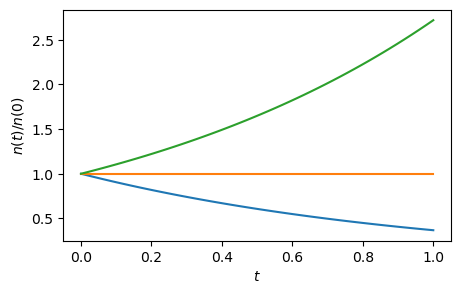

In [5]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 1)
plt.figure(figsize=(5,3))
plt.plot(t, n_0*np.exp((0.999-1)/l_oo*t))
plt.plot(t, n_0*np.exp((1.000-1)/l_oo*t))
plt.plot(t, n_0*np.exp((1.001-1)/l_oo*t))
plt.ylabel("$n(t)/n(0)$")
plt.xlabel("$t$");

# Source-Driven, Subcritical Systems

When $S(t) \neq 0$, we go from

$$
   \frac{d}{dt} \left ( n(t) e^{-\left(\frac{k_{\infty}-1}{l_{\infty}}\right )t} \right ) = S(t) e^{-\left(\frac{k_{\infty}-1}{l_{\infty}}\right )t} .
$$

to

$$
   n(t') =  \frac{\int^{t'}_0  \left( S(t) e^{-\left(\frac{k_{\infty}-1}{l_{\infty}}\right )t} \right ) dt + n(0)}
                 {e^{-\left(\frac{k_{\infty}-1}{l_{\infty}}\right )t'}}
$$

If $S(t) = S_0$, then

$$
   n(t) = \frac{l_{\infty} S_0}{k_{\infty}-1}
     \left (  e^{\frac{k_{\infty}-1}{l_{\infty}}t} - 1 \right )
     + n(0) e^{\frac{k_{\infty}-1}{l_{\infty}}t} \, .
$$

If we further set $n(0) = 0$ and drop $\infty$'s, we get Lewis Eq. (5.26).

## Example 3

Let $n(0) = 0$, $S_0 = 1$, and $l_{\infty} = 10^{-2}$.  Compute and plot $n(t)$ for $0 \leq t \leq 10$ s for $k_{\infty} = 0.5, 0.9, 0.99$ and $0.999$.  What happens to $n(t)/S_0$ as $t\to \infty$?

In [1]:
def n(t, k_oo):
    l_oo = 1e-2
    S_0 = 1
    return (l_oo*S_0/(k_oo-1))*(np.exp((k_oo-1)/l_oo*t) - 1)

In [3]:
import numpy as np
t = np.linspace(0, 10, 10000)

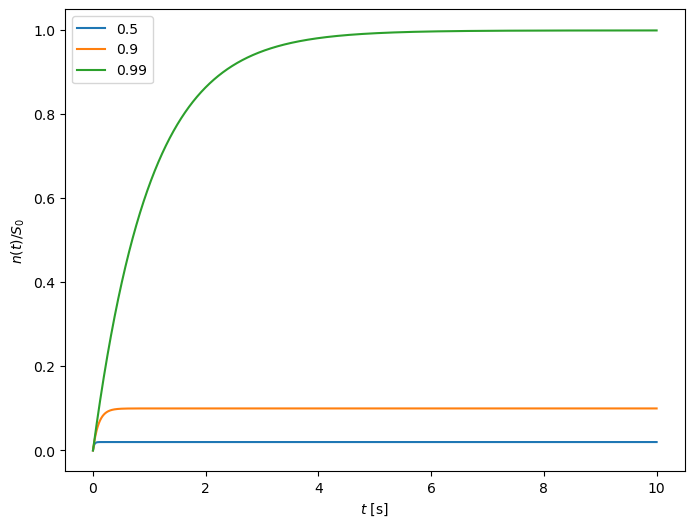

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(t, n(t, k_oo=0.5), label='0.5')
plt.plot(t, n(t, k_oo=0.9), label='0.9')
plt.plot(t, n(t, k_oo=0.99), label='0.99')
#plt.plot(t, n(t, k_oo=0.999), label='0.999')
#plt.yscale("log")
plt.xlabel("$t$ [s]"); plt.ylabel("$n(t)/S_0$")
plt.legend();

If we replace the "unit" source with $S_0$ in the HW 7, problem 4 solution, we have

\begin{equation*}
   \phi_1 = \frac{ \frac{S_0}{\Sigma_{r1}} }{ 1 - \frac{\nu\Sigma_{f1}-\nu\Sigma_{f2} \frac{\Sigma_{s2\gets 1}}{\Sigma_{a2}}}{\Sigma_{r1}} } = \frac{ \frac{S_0}{\Sigma_{r1}} }{ 1 - k_{\infty} }  \, .
\end{equation*}



If we ignore the two-group stuff, set $\Sigma_{r1} = \bar{\Sigma}_{a}$, and set $\phi_1 = \bar{v}n$, then we have

$$
   n(\infty) = \frac{l_{\infty} S_0}{1-k_{\infty}} \, ,
$$

which (dropping $\infty$'s) is equivalent to Eq. (5.28) in the book.  The quantity $M=1/(1-k)$ is sometimes called the *multiplication*, and we'll use it next semester to predict how close we get to criticality.  (Notice that it takes longer and longer to stabilize the closer to $k = 1$ we get!).

**El fin**: Read 5.4!

In [12]:
x=1.23
print(f"x = {x}")

x = 1.23
